### Project Objectives:
- In this project I aim to predict the median housing value using neural network model in Keras
- Author: Carlos Caballero - Data Scientist
- Dataset: CA housing dataset obtained from https://raw.githubusercoent.com/ageron/hansdon-ml2/master/datasets/housing
- Models: Multilayer Perceptron (MLP), with stochastic gradient descent (SGD), no activation function due to single output 
- Method: Randomized Search CV

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import sklearn
import csv
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf
from tensorflow import keras

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
housing = fetch_california_housing()

In [8]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Build Sequential Regressor

In [14]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
    return model 

In [15]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [28]:
# Now use this object like a regular Scikit-Learn regressor

history = keras_reg.fit(X_train, y_train, epochs=30,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 48us/sample - loss: 1.2325 - accuracy: 0.0028 - val_loss: 0.6629 - val_accuracy: 0.0028
Epoch 2/30
11610/11610 [==============================] - 0s 28us/sample - loss: 0.6731 - accuracy: 0.0029 - val_loss: 0.5897 - val_accuracy: 0.0028
Epoch 3/30
11610/11610 [==============================] - 0s 28us/sample - loss: 0.6165 - accuracy: 0.0029 - val_loss: 0.5474 - val_accuracy: 0.0028
Epoch 4/30
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5581 - accuracy: 0.0029 - val_loss: 0.5049 - val_accuracy: 0.0028
Epoch 5/30
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5253 - accuracy: 0.0029 - val_loss: 0.4850 - val_accuracy: 0.0028
Epoch 6/30
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5080 - accuracy: 0.0029 - val_loss: 0.4692 - val_accuracy: 0.0028
Epoch 7/30
11610/11610 [==============================] -

In [18]:
mse_test = keras_reg.score(X_test, y_test)

5160/5160 [==============================] - 0s 17us/sample - loss: 0.3952 - accuracy: 0.0033


In [24]:
# Make new instances for evaluation

X_new = X_test[:3] # created 3 new instances
y_pred = keras_reg.predict(X_new)

In [25]:
y_pred = keras_reg.predict(X_new)

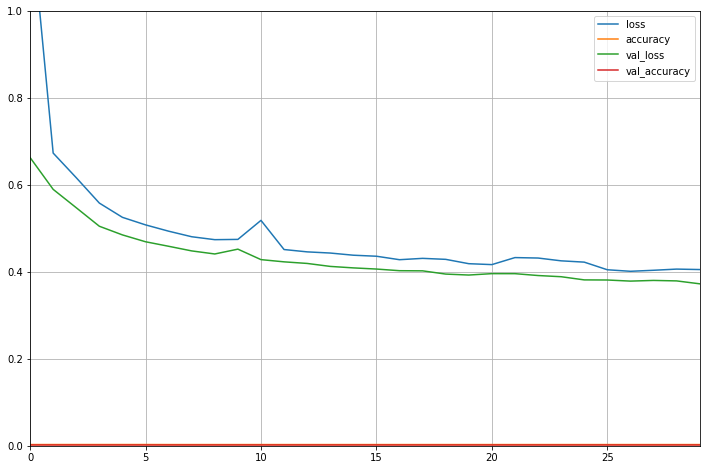

In [29]:
# Visualize model
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1) #set vertical range to [0-1]
plt.show()

## Utilize 'randomized search' to find best hyperparameters

In [32]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [33]:
param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1,100),
    'learning_rate': reciprocal(3e-4,3e-2)
}

In [39]:
# Initialize random search and find best parameters
# This may take a while depending on dataset size
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_history = rnd_search_cv.fit(X_train, y_train, epochs=30,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/30
7740/7740 [==============================] - 1s 68us/sample - loss: 1.4045 - accuracy: 0.0023 - val_loss: 0.7031 - val_accuracy: 0.0028
Epoch 2/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.7012 - accuracy: 0.0023 - val_loss: 0.6072 - val_accuracy: 0.0028
Epoch 3/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.6118 - accuracy: 0.0023 - val_loss: 0.5495 - val_accuracy: 0.0028
Epoch 4/30
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5556 - accuracy: 0.0023 - val_loss: 0.5048 - val_accuracy: 0.0028
Epoch 5/30
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5113 - accuracy: 0.0023 - val_loss: 0.4699 - val_accuracy: 0.0028
Epoch 6/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4778 - accuracy: 0.0023 - val_loss: 0.4426 - val_accuracy: 0.0028
Epoch 7/30
7740/7740 [==============================] - 0s 32us/sample

7740/7740 [==============================] - 0s 36us/sample - loss: 0.3995 - accuracy: 0.0035 - val_loss: 0.3655 - val_accuracy: 0.0028
Epoch 26/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3967 - accuracy: 0.0035 - val_loss: 0.3627 - val_accuracy: 0.0028
Epoch 27/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3930 - accuracy: 0.0035 - val_loss: 0.3593 - val_accuracy: 0.0028
Epoch 28/30
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3902 - accuracy: 0.0035 - val_loss: 0.3600 - val_accuracy: 0.0028
Epoch 29/30
7740/7740 [==============================] - 0s 32us/sample - loss: 0.3873 - accuracy: 0.0035 - val_loss: 0.3617 - val_accuracy: 0.0028
Epoch 30/30
3870/3870 [==============================] - 0s 16us/sample - loss: 0.3659 - accuracy: 0.0018
Train on 7740 samples, validate on 3870 samples
Epoch 1/30
7740/7740 [==============================] - 1s 68us/sample - loss: 1.4596 - accuracy: 0.0028 - val_loss: 0

Epoch 6/30
7740/7740 [==============================] - 0s 26us/sample - loss: 11618.8643 - accuracy: 0.0023 - val_loss: 41325.1257 - val_accuracy: 0.0010
Epoch 7/30
7740/7740 [==============================] - 0s 29us/sample - loss: 95798.1502 - accuracy: 0.0013 - val_loss: 304818.6734 - val_accuracy: 0.0018
Epoch 8/30
7740/7740 [==============================] - 0s 28us/sample - loss: 609296.6033 - accuracy: 0.0018 - val_loss: 2311349.9514 - val_accuracy: 0.0013
Epoch 9/30
7740/7740 [==============================] - 0s 27us/sample - loss: 4959566.4833 - accuracy: 0.0018 - val_loss: 16737836.3976 - val_accuracy: 0.0018
Epoch 10/30
7740/7740 [==============================] - 0s 28us/sample - loss: 41120076.6163 - accuracy: 0.0014 - val_loss: 123572710.3169 - val_accuracy: 7.7519e-04
Epoch 11/30
3870/3870 [==============================] - 0s 12us/sample - loss: 5715831601.3003 - accuracy: 0.0018
Train on 7740 samples, validate on 3870 samples
Epoch 1/30
7740/7740 [===================

7740/7740 [==============================] - 0s 28us/sample - loss: 1.0791 - accuracy: 0.0034 - val_loss: 0.8802 - val_accuracy: 0.0028
Epoch 5/30
7740/7740 [==============================] - 0s 26us/sample - loss: 0.8633 - accuracy: 0.0035 - val_loss: 0.7371 - val_accuracy: 0.0028
Epoch 6/30
7740/7740 [==============================] - 0s 29us/sample - loss: 0.7572 - accuracy: 0.0035 - val_loss: 0.6664 - val_accuracy: 0.0028
Epoch 7/30
7740/7740 [==============================] - 0s 27us/sample - loss: 0.7025 - accuracy: 0.0035 - val_loss: 0.6289 - val_accuracy: 0.0028
Epoch 8/30
7740/7740 [==============================] - 0s 27us/sample - loss: 0.6724 - accuracy: 0.0035 - val_loss: 0.6084 - val_accuracy: 0.0028
Epoch 9/30
7740/7740 [==============================] - 0s 27us/sample - loss: 0.6545 - accuracy: 0.0035 - val_loss: 0.5956 - val_accuracy: 0.0028
Epoch 10/30
7740/7740 [==============================] - 0s 26us/sample - loss: 0.6427 - accuracy: 0.0035 - val_loss: 0.5869 - va

7740/7740 [==============================] - 0s 28us/sample - loss: 0.5631 - accuracy: 0.0028 - val_loss: 0.5131 - val_accuracy: 0.0028
Epoch 29/30
7740/7740 [==============================] - 0s 27us/sample - loss: 0.5618 - accuracy: 0.0028 - val_loss: 0.5116 - val_accuracy: 0.0028
Epoch 30/30
3870/3870 [==============================] - 0s 13us/sample - loss: 0.5532 - accuracy: 0.0028
Train on 7740 samples, validate on 3870 samples
Epoch 1/30
7740/7740 [==============================] - 1s 95us/sample - loss: 0.8492 - accuracy: 0.0023 - val_loss: 0.5266 - val_accuracy: 0.0028
Epoch 2/30
7740/7740 [==============================] - 0s 35us/sample - loss: 1.2985 - accuracy: 0.0023 - val_loss: 0.4477 - val_accuracy: 0.0028
Epoch 3/30
7740/7740 [==============================] - 0s 37us/sample - loss: 0.6027 - accuracy: 0.0023 - val_loss: 0.4871 - val_accuracy: 0.0028
Epoch 4/30
7740/7740 [==============================] - 0s 37us/sample - loss: 1.0162 - accuracy: 0.0023 - val_loss: 0.44

7740/7740 [==============================] - 0s 34us/sample - loss: 0.3600 - accuracy: 0.0030 - val_loss: 0.3316 - val_accuracy: 0.0028
Epoch 7/30
7740/7740 [==============================] - 0s 37us/sample - loss: 0.3505 - accuracy: 0.0030 - val_loss: 0.3544 - val_accuracy: 0.0028
Epoch 8/30
7740/7740 [==============================] - 0s 37us/sample - loss: 0.3471 - accuracy: 0.0030 - val_loss: 0.3176 - val_accuracy: 0.0028
Epoch 9/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3391 - accuracy: 0.0030 - val_loss: 0.3313 - val_accuracy: 0.0028
Epoch 10/30
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3311 - accuracy: 0.0030 - val_loss: 0.3463 - val_accuracy: 0.0028
Epoch 11/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3304 - accuracy: 0.0030 - val_loss: 0.3201 - val_accuracy: 0.0028
Epoch 12/30
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3241 - accuracy: 0.0030 - val_loss: 0.3238 - 

3870/3870 [==============================] - 0s 15us/sample - loss: 0.4223 - accuracy: 0.0041
Train on 7740 samples, validate on 3870 samples
Epoch 1/30
7740/7740 [==============================] - 0s 62us/sample - loss: 1.3988 - accuracy: 0.0035 - val_loss: 0.6780 - val_accuracy: 0.0028
Epoch 2/30
7740/7740 [==============================] - 0s 32us/sample - loss: 0.6673 - accuracy: 0.0035 - val_loss: 0.5936 - val_accuracy: 0.0028
Epoch 3/30
7740/7740 [==============================] - 0s 32us/sample - loss: 0.6063 - accuracy: 0.0035 - val_loss: 0.5406 - val_accuracy: 0.0028
Epoch 4/30
7740/7740 [==============================] - 0s 30us/sample - loss: 0.5537 - accuracy: 0.0035 - val_loss: 0.4999 - val_accuracy: 0.0028
Epoch 5/30
7740/7740 [==============================] - 0s 30us/sample - loss: 0.5338 - accuracy: 0.0035 - val_loss: 0.4802 - val_accuracy: 0.0028
Epoch 6/30
7740/7740 [==============================] - 0s 32us/sample - loss: 0.5006 - accuracy: 0.0034 - val_loss: 0.4536

7740/7740 [==============================] - 0s 31us/sample - loss: 0.4189 - accuracy: 0.0030 - val_loss: 0.3904 - val_accuracy: 0.0028
Epoch 24/30
7740/7740 [==============================] - 0s 31us/sample - loss: 0.4138 - accuracy: 0.0030 - val_loss: 0.3875 - val_accuracy: 0.0028
Epoch 25/30
7740/7740 [==============================] - 0s 31us/sample - loss: 0.4122 - accuracy: 0.0030 - val_loss: 0.3852 - val_accuracy: 0.0028
Epoch 26/30
7740/7740 [==============================] - 0s 31us/sample - loss: 0.4102 - accuracy: 0.0030 - val_loss: 0.3842 - val_accuracy: 0.0028
Epoch 27/30
7740/7740 [==============================] - 0s 31us/sample - loss: 0.4069 - accuracy: 0.0030 - val_loss: 0.3841 - val_accuracy: 0.0028
Epoch 28/30
7740/7740 [==============================] - 0s 32us/sample - loss: 0.4064 - accuracy: 0.0030 - val_loss: 0.3796 - val_accuracy: 0.0028
Epoch 29/30
7740/7740 [==============================] - 0s 31us/sample - loss: 0.4052 - accuracy: 0.0030 - val_loss: 0.3799

7740/7740 [==============================] - 0s 35us/sample - loss: 0.4650 - accuracy: 0.0030 - val_loss: 0.3965 - val_accuracy: 0.0028
Epoch 5/30
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4922 - accuracy: 0.0030 - val_loss: 0.4208 - val_accuracy: 0.0028
Epoch 6/30
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4192 - accuracy: 0.0030 - val_loss: 0.3635 - val_accuracy: 0.0028
Epoch 7/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4004 - accuracy: 0.0030 - val_loss: 0.3744 - val_accuracy: 0.0028
Epoch 8/30
7740/7740 [==============================] - 0s 31us/sample - loss: 0.3920 - accuracy: 0.0030 - val_loss: 0.3607 - val_accuracy: 0.0028
Epoch 9/30
7740/7740 [==============================] - 0s 32us/sample - loss: 0.3871 - accuracy: 0.0030 - val_loss: 0.3658 - val_accuracy: 0.0028
Epoch 10/30
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3805 - accuracy: 0.0030 - val_loss: 0.3478 - va

7740/7740 [==============================] - 0s 32us/sample - loss: 0.3014 - accuracy: 0.0023 - val_loss: 0.3140 - val_accuracy: 0.0028
Epoch 29/30
7740/7740 [==============================] - 0s 32us/sample - loss: 0.2960 - accuracy: 0.0023 - val_loss: 0.3039 - val_accuracy: 0.0028
Epoch 30/30
3870/3870 [==============================] - 0s 13us/sample - loss: 0.3398 - accuracy: 0.0041
Train on 7740 samples, validate on 3870 samples
Epoch 1/30
7740/7740 [==============================] - 1s 68us/sample - loss: 0.7447 - accuracy: 0.0035 - val_loss: 0.5956 - val_accuracy: 0.0028
Epoch 2/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4707 - accuracy: 0.0035 - val_loss: 0.4073 - val_accuracy: 0.0028
Epoch 3/30
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4199 - accuracy: 0.0035 - val_loss: 0.3720 - val_accuracy: 0.0028
Epoch 4/30
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4016 - accuracy: 0.0035 - val_loss: 0.35

7740/7740 [==============================] - 0s 36us/sample - loss: 0.3142 - accuracy: 0.0030 - val_loss: 0.3167 - val_accuracy: 0.0028
Epoch 22/30
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3133 - accuracy: 0.0030 - val_loss: 0.3108 - val_accuracy: 0.0028
Epoch 23/30
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3117 - accuracy: 0.0030 - val_loss: 0.2845 - val_accuracy: 0.0028
Epoch 24/30
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3087 - accuracy: 0.0030 - val_loss: 0.3133 - val_accuracy: 0.0028
Epoch 25/30
7740/7740 [==============================] - 0s 36us/sample - loss: 0.3276 - accuracy: 0.0030 - val_loss: 0.3153 - val_accuracy: 0.0028
Epoch 26/30
7740/7740 [==============================] - 0s 37us/sample - loss: 0.3588 - accuracy: 0.0030 - val_loss: 0.3265 - val_accuracy: 0.0028
Epoch 27/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3199 - accuracy: 0.0030 - val_loss: 0.3131

7740/7740 [==============================] - 0s 34us/sample - loss: 0.3921 - accuracy: 0.0035 - val_loss: 0.3631 - val_accuracy: 0.0028
Epoch 15/30
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3891 - accuracy: 0.0035 - val_loss: 0.3628 - val_accuracy: 0.0028
Epoch 16/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3857 - accuracy: 0.0035 - val_loss: 0.3609 - val_accuracy: 0.0028
Epoch 17/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3819 - accuracy: 0.0035 - val_loss: 0.3535 - val_accuracy: 0.0028
Epoch 18/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.3786 - accuracy: 0.0035 - val_loss: 0.3539 - val_accuracy: 0.0028
Epoch 19/30
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3761 - accuracy: 0.0035 - val_loss: 0.3496 - val_accuracy: 0.0028
Epoch 20/30
7740/7740 [==============================] - 0s 33us/sample - loss: 0.3729 - accuracy: 0.0035 - val_loss: 0.3603

7740/7740 [==============================] - 0s 27us/sample - loss: 1.6521 - accuracy: 0.0021 - val_loss: 1.3726 - val_accuracy: 0.0028
Epoch 8/30
7740/7740 [==============================] - 0s 27us/sample - loss: 1.3667 - accuracy: 0.0023 - val_loss: 1.1475 - val_accuracy: 0.0028
Epoch 9/30
7740/7740 [==============================] - 0s 29us/sample - loss: 1.1570 - accuracy: 0.0023 - val_loss: 0.9818 - val_accuracy: 0.0028
Epoch 10/30
7740/7740 [==============================] - 0s 28us/sample - loss: 1.0020 - accuracy: 0.0023 - val_loss: 0.8596 - val_accuracy: 0.0028
Epoch 11/30
7740/7740 [==============================] - 0s 28us/sample - loss: 0.8875 - accuracy: 0.0023 - val_loss: 0.7693 - val_accuracy: 0.0028
Epoch 12/30
7740/7740 [==============================] - 0s 28us/sample - loss: 0.8024 - accuracy: 0.0023 - val_loss: 0.7026 - val_accuracy: 0.0028
Epoch 13/30
7740/7740 [==============================] - 0s 28us/sample - loss: 0.7392 - accuracy: 0.0023 - val_loss: 0.6530 -

3870/3870 [==============================] - 0s 13us/sample - loss: 0.6230 - accuracy: 0.0018
Train on 7740 samples, validate on 3870 samples
Epoch 1/30
7740/7740 [==============================] - 1s 81us/sample - loss: 6.0402 - accuracy: 7.7519e-04 - val_loss: 5.0679 - val_accuracy: 0.0018
Epoch 2/30
7740/7740 [==============================] - 0s 27us/sample - loss: 4.6075 - accuracy: 0.0012 - val_loss: 3.8751 - val_accuracy: 0.0018
Epoch 3/30
7740/7740 [==============================] - 0s 26us/sample - loss: 3.5526 - accuracy: 0.0016 - val_loss: 2.9962 - val_accuracy: 0.0023
Epoch 4/30
7740/7740 [==============================] - 0s 29us/sample - loss: 2.7747 - accuracy: 0.0019 - val_loss: 2.3482 - val_accuracy: 0.0023
Epoch 5/30
7740/7740 [==============================] - 0s 27us/sample - loss: 2.1999 - accuracy: 0.0022 - val_loss: 1.8693 - val_accuracy: 0.0028
Epoch 6/30
7740/7740 [==============================] - 0s 28us/sample - loss: 1.7747 - accuracy: 0.0025 - val_loss: 1.

7740/7740 [==============================] - 0s 33us/sample - loss: 0.4442 - accuracy: 0.0023 - val_loss: 0.4243 - val_accuracy: 0.0028
Epoch 25/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4404 - accuracy: 0.0023 - val_loss: 0.4232 - val_accuracy: 0.0028
Epoch 26/30
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4377 - accuracy: 0.0023 - val_loss: 0.4193 - val_accuracy: 0.0028
Epoch 27/30
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4343 - accuracy: 0.0023 - val_loss: 0.4185 - val_accuracy: 0.0028
Epoch 28/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4324 - accuracy: 0.0023 - val_loss: 0.4152 - val_accuracy: 0.0028
Epoch 29/30
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4299 - accuracy: 0.0023 - val_loss: 0.4132 - val_accuracy: 0.0028
Epoch 30/30
3870/3870 [==============================] - 0s 16us/sample - loss: 0.4586 - accuracy: 0.0041
Train on 7740 samp

7740/7740 [==============================] - 0s 34us/sample - loss: 0.4554 - accuracy: 0.0030 - val_loss: 0.4216 - val_accuracy: 0.0028
Epoch 18/30
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4505 - accuracy: 0.0030 - val_loss: 0.4189 - val_accuracy: 0.0028
Epoch 19/30
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4464 - accuracy: 0.0030 - val_loss: 0.4146 - val_accuracy: 0.0028
Epoch 20/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4427 - accuracy: 0.0030 - val_loss: 0.4117 - val_accuracy: 0.0028
Epoch 21/30
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4388 - accuracy: 0.0030 - val_loss: 0.4082 - val_accuracy: 0.0028
Epoch 22/30
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4358 - accuracy: 0.0030 - val_loss: 0.4062 - val_accuracy: 0.0028
Epoch 23/30
7740/7740 [==============================] - 0s 33us/sample - loss: 0.4327 - accuracy: 0.0030 - val_loss: 0.4027

C:\Users\carlo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


11610/11610 [==============================] - 1s 53us/sample - loss: 0.6829 - accuracy: 0.0029 - val_loss: 0.5747 - val_accuracy: 0.0028
Epoch 2/30
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4537 - accuracy: 0.0029 - val_loss: 0.3681 - val_accuracy: 0.0028
Epoch 3/30
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4098 - accuracy: 0.0029 - val_loss: 0.3628 - val_accuracy: 0.0028
Epoch 4/30
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3979 - accuracy: 0.0029 - val_loss: 0.3502 - val_accuracy: 0.0028
Epoch 5/30
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3751 - accuracy: 0.0029 - val_loss: 0.3561 - val_accuracy: 0.0028
Epoch 6/30
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3836 - accuracy: 0.0029 - val_loss: 0.3702 - val_accuracy: 0.0028
Epoch 7/30
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3651 - accuracy: 0.0029 - val_loss

In [40]:
# Find best parameters after exploration above
rnd_search_cv.best_params_

{'learning_rate': 0.029529055538647, 'n_hidden': 3, 'n_neurons': 19}

In [41]:
# Find best score
rnd_search_cv.best_score_

-0.3118103101528687

In [42]:
# Create best model
model = rnd_search_cv.best_estimator_.model